In [2]:
import warnings
warnings.simplefilter('ignore')

# Отображение графиков в jupiter
%matplotlib inline
# Импорт библиотек для отображения графиков
import seaborn as sns
from matplotlib import pyplot as plt
# Делаем рисунки графиков в svg  более четкими
%config InlineBackend.figure_format='svg'

# Увеличиваем дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
# Отображение всего вывода(по умолчанию отображается только последний)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv('../../data/data.csv')

In [5]:
df.head()

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,biélorusse,bielorruso,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,lombard,lombardo,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...


In [9]:
df.shape

(2722, 15)

In [10]:
df.columns


Index(['ID', 'Name in English', 'Name in French', 'Name in Spanish',
       'Countries', 'Country codes alpha 3', 'ISO639-3 codes',
       'Degree of endangerment', 'Alternate names', 'Name in the language',
       'Number of speakers', 'Sources', 'Latitude', 'Longitude',
       'Description of the location'],
      dtype='object')

In [11]:
df.dtypes

ID                               int64
Name in English                 object
Name in French                  object
Name in Spanish                 object
Countries                       object
Country codes alpha 3           object
ISO639-3 codes                  object
Degree of endangerment          object
Alternate names                 object
Name in the language            object
Number of speakers             float64
Sources                         object
Latitude                       float64
Longitude                      float64
Description of the location     object
dtype: object

# Какие задачи можно представить?
#### Ну во первых узнать языки с наибольшим и наименьшим количеством говорящих количеством говорящих

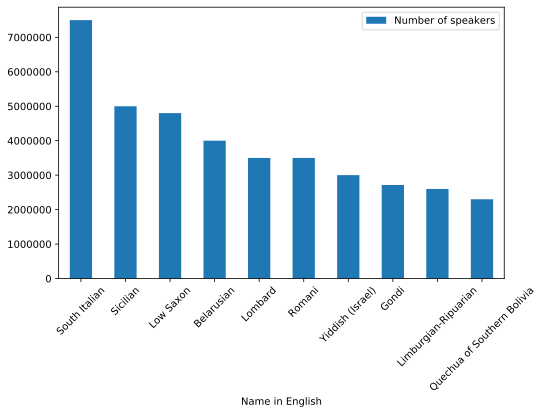

In [22]:
max_speakers = df[['Name in English','Number of speakers']].sort_values(by='Number of speakers',ascending=False)[:10]
# Устанавливаем индекс
max_speakers=max_speakers.set_index('Name in English')

max_speakers.plot(kind='bar',rot=45);

In [24]:
# По идее здесь можно было бы проводить аналих в зависимости от географического расположения
lst = df['Countries'].unique()

In [25]:
len(lst)

253

In [29]:
df = pd.read_csv('../../data/data1.csv')
df.head()

,region_code,region_name,total,tuberculosis,tumors,nervous_system,malformations,endocrine_system,mental_disorder,eye_desease,ear_desease,circulatory_system_desease,respiratory_system_desease,digestive_disease,musculoskeletal_system_desease,genitourinary_system_desease,perinatal_conditions,work_related_injuries,other
0,NaN,Российская Федерация,73106,489,3505,14465,13108,6997,17825,2652,2768,895,1431,936,3437,895,356,1181,2166
1,NaN,Центральный Федеральный округ,15942,32,1112,2453,3311,1848,3694,373,602,176,201,238,921,198,76,195,512
2,31.0,Белгородская область,651,0,34,124,122,64,172,9,24,7,4,7,49,3,1,10,21
3,32.0,Брянская область,550,0,30,44,118,77,166,15,16,6,8,8,36,10,0,5,11
4,33.0,Владимирская область,604,0,23,106,107,56,169,16,21,8,5,9,49,0,1,14,20


Object `str.isin` not found.


In [33]:
# Первая запись суммирующая будет искажать наш анализ, поэтому уберем ее.
# Сделаем названия регионов индексами
df.drop([0],inplace=True)
# Также в таблице есть суммирующие данные по округам их то же нужно удалить
# сделаем это методом фильтрации
clean_df = df[[df['region_name']].str.isin()]

In [42]:
df['region_name'].isin(['Центральный'])

1     False
2     False
3     False
4     False
5     False
      ...  
89    False
90    False
91    False
92    False
93    False
Name: region_name, Length: 93, dtype: bool

In [40]:
lst = []
for i 

1     Центральный Федеральный округ
2              Белгородская область
3                  Брянская область
4              Владимирская область
5               Воронежская область
                  ...              
89     Еврейская автономная область
90       Чукотский автономный округ
91       Крымский Федеральный округ
92                  Республика Крым
93                   г. Севастополь
Name: region_name, Length: 93, dtype: object